In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Boston House Price Data

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys() # 

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

%% the features

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [5]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

%% here we use only one feature to test our simple linear regression

In [6]:
x = boston.data[:,5] #the feature: number of rooms

In [7]:
x.shape

(506,)

In [8]:
y = boston.target

In [9]:
y.shape

(506,)

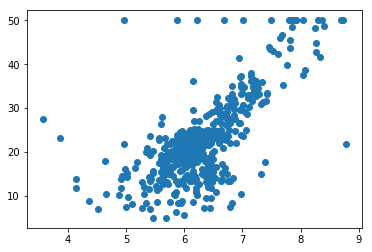

In [10]:
plt.scatter(x,y)
plt.show()

%% we can see the horizatal points in the value of 50 from  above figure,we can guess that the dataset set the price to 50 when it is more than 50,so we can print the max

In [11]:
np.max(y)

50.0

In [12]:
x = x[y < 50.0]
y = y[y < 50.0]

%% it is realy ,so we get the the data whose price is less than 50

In [13]:
x.shape

(490,)

## use our simple linear regression

In [14]:
from model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,seed = 222)

In [15]:
x_train.shape

(392,)

In [16]:
y_train.shape

(392,)

In [17]:
x_test.shape

(98,)

In [18]:
from SimpleLinearRegression import SimpleLinearRegression2

In [19]:
reg = SimpleLinearRegression2()
reg.fit(x_train,y_train)

SimpleLinearRegression2()

In [20]:
reg._a

8.3491417887431929

In [21]:
reg._b

-30.218730492486401

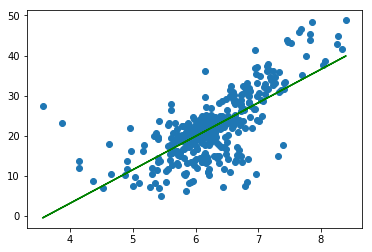

In [22]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color ='g')
plt.show()

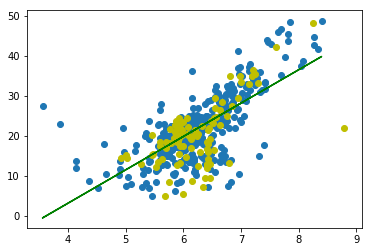

In [23]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test,color = 'y')
plt.plot(x_train,reg.predict(x_train),color = 'g')
plt.show()

In [24]:
y_predict = reg.predict(x_test)

## MSE

In [25]:
mse_test = np.sum((y_predict - y_test)**2)/len(y_test)
mse_test

37.188209116927581

## RMSE

In [26]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

6.098213600467565

## MAE

In [27]:
mae_test = np.sum(np.absolute(y_predict - y_test))/ len(y_test)
mae_test

4.3779620891121516

## encapsulate our own performance function

In [28]:
from metrics import mean_square_error
from metrics import root_mean_square_error
from metrics import mean_abs_error

In [29]:
mean_square_error(y_test,y_predict)

37.188209116927581

In [30]:
root_mean_square_error(y_test,y_predict)

6.098213600467565

In [31]:
mean_abs_error(y_test,y_predict)

4.3779620891121516

## use MSE and MAE in scikit-learn

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [33]:
mean_squared_error(y_test,y_predict)

37.188209116927581

In [34]:
mean_absolute_error(y_test,y_predict)

4.3779620891121516

## R Score

In [35]:
from metrics import r2_score

In [36]:
r2_score(y_test,y_predict)

0.34963760845946956

### r2-score in scikit-learn

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.34963760845946956